In [1]:
# !pip install bmi_nwis

In [2]:
import dataretrieval.nwis as nwis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Get data from NWIS
qdata = nwis.get_record(sites='09085000', service='dv',
                        start='1970-10-01', end='2020-09-30')
qdata

,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00010_Mean,00010_Mean_cd,00060_Mean,00060_Mean_cd,00095_Maximum,00095_Maximum_cd,00095_Minimum,00095_Minimum_cd,00095_Mean,00095_Mean_cd
datetime,,,,,,,,,,,,,,,
1970-10-01 00:00:00+00:00,NaN,NaN,09085000,NaN,NaN,NaN,NaN,905.0,A,NaN,NaN,NaN,NaN,NaN,NaN
1970-10-02 00:00:00+00:00,NaN,NaN,09085000,NaN,NaN,NaN,NaN,914.0,A,NaN,NaN,NaN,NaN,NaN,NaN
1970-10-03 00:00:00+00:00,NaN,NaN,09085000,NaN,NaN,NaN,NaN,887.0,A,NaN,NaN,NaN,NaN,NaN,NaN
1970-10-04 00:00:00+00:00,NaN,NaN,09085000,NaN,NaN,NaN,NaN,842.0,A,NaN,NaN,NaN,NaN,NaN,NaN
1970-10-05 00:00:00+00:00,NaN,NaN,09085000,NaN,NaN,NaN,NaN,833.0,A,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26 00:00:00+00:00,15.1,A,09085000,11.1,A,13.3,A,518.0,A,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-27 00:00:00+00:00,14.9,A,09085000,11.5,A,13.1,A,514.0,A,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-28 00:00:00+00:00,13.0,A,09085000,9.1,A,11.2,A,511.0,A,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='datetime'>

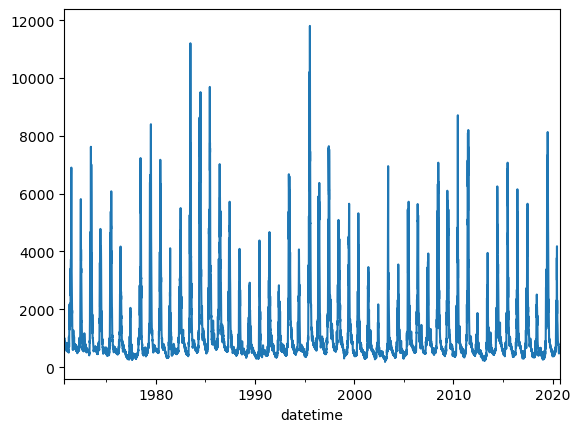

In [4]:
qdata['00060_Mean'].plot()

<AxesSubplot:xlabel='datetime'>

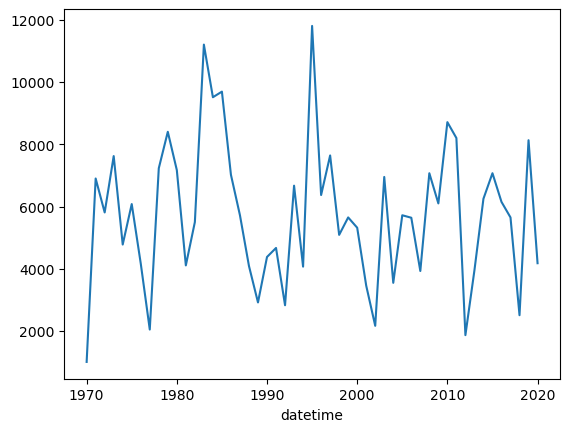

In [5]:
qdata['00060_Mean'].groupby(qdata.index.year).max().plot()

In [6]:
q_seasonal = qdata['00060_Mean'].groupby(qdata.index.month).mean().values
q_seasonal 

array([ 481.08322581,  455.53573956,  517.15870968,  836.286     ,
       2140.80709677, 3891.82866667, 2156.68516129,  943.44387097,
        743.78533333,  721.86645161,  636.618     ,  540.51419355])

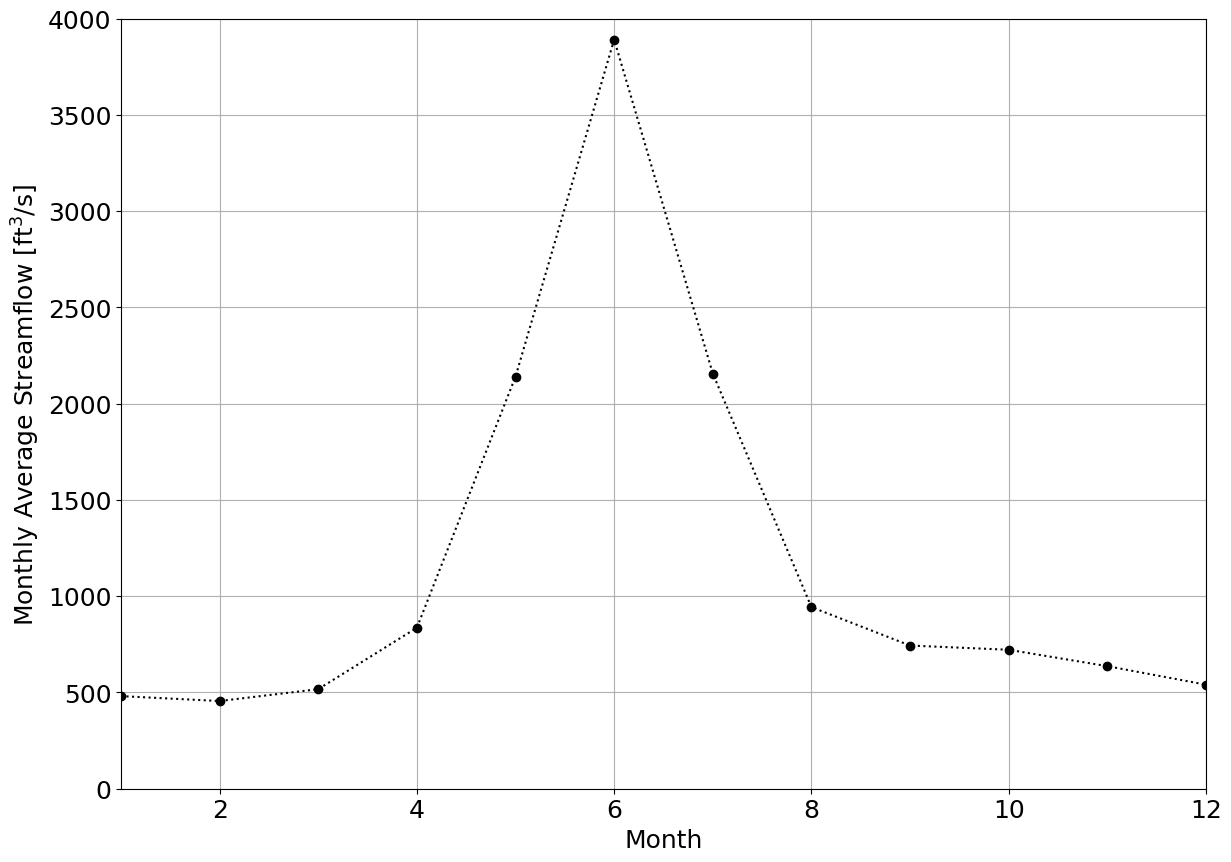

In [7]:
plt.figure(figsize=(14,10)) # Create a figure that is 14 x 10
plt.rcParams.update({'font.size': 18}) # Increase font size to 18
plt.plot((np.arange(q_seasonal.size)+1), q_seasonal, 'ko:')
plt.xlabel('Month')
plt.ylabel('Monthly Average Streamflow [ft${}^3$/s]') # Everything between $s is Latex
plt.xlim([1,12])
plt.ylim([0,4000])
plt.grid()
plt.show()